# Imports

In [1]:
import torch
import torch.optim as optim
import numpy as np
import node_models
import loader
import training
import metrics
import autotune
import config

# GPU

In [2]:
device = torch.device("cuda")

# Data Loading

In [3]:
mnist_data_path = './train-images-idx3-ubyte'
mnist_label_path = './train-labels-idx1-ubyte'

In [4]:
#5-fold generation
mnist_data = loader.MNIST(mnist_data_path, mnist_label_path, 5)
mnist_splits = mnist_data.splits

In [5]:
print("MNIST STATS")
print("Number of splits:", len(mnist_splits))
print("Number of segments per split (train, val, test):", len(mnist_splits[0]))
print("Info per segment (data, labels):", len(mnist_splits[0][0]))
print("Size of segement (num examples):", len(mnist_splits[0][0][0]))

MNIST STATS
Number of splits: 5
Number of segments per split (train, val, test): 3
Info per segment (data, labels): 2
Size of segement (num examples): 48000


# Model & Optimizer

In [6]:
model = node_models.NeuralODE
optimizer = optim.Adam

# Training and Evaluation

## MNIST

### NODE

In [7]:
model_params = config.baseline_config_mnist_node['model']
lr, epochs, batch, workers = config.baseline_config_mnist_node['train']

In [8]:
node_mnist_trainer = training.Trainer(model, optimizer, mnist_data, device)

In [9]:
node_mnist_trainer.train(model_params, lr, epochs, batch, workers, verbose=False)

[Fold 1] Epoch:1 Training Acc:0.7992291666666667
[Fold 1] Epoch:1 Validation Acc:0.8815
[Fold 1] Epoch:2 Training Acc:0.900125
[Fold 1] Epoch:2 Validation Acc:0.902
[Fold 1] Epoch:3 Training Acc:0.9107916666666667
[Fold 1] Epoch:3 Validation Acc:0.905
[Fold 1] Epoch:4 Training Acc:0.9157916666666667
[Fold 1] Epoch:4 Validation Acc:0.915
[Fold 1] Epoch:5 Training Acc:0.9200625
[Fold 1] Epoch:5 Validation Acc:0.9168333333333333
[Fold 1] Epoch:6 Training Acc:0.921625
[Fold 1] Epoch:6 Validation Acc:0.9126666666666666
[Fold 1] Epoch:7 Training Acc:0.92275
[Fold 1] Epoch:7 Validation Acc:0.922
[Fold 1] Epoch:8 Training Acc:0.9268958333333334
[Fold 1] Epoch:8 Validation Acc:0.921
[Fold 1] Epoch:9 Training Acc:0.9263333333333333
[Fold 1] Epoch:9 Validation Acc:0.9218333333333333
[Fold 1] Epoch:10 Training Acc:0.927625
[Fold 1] Epoch:10 Validation Acc:0.9183333333333333
[Fold 1] Epoch:11 Training Acc:0.9324166666666667
[Fold 1] Epoch:11 Validation Acc:0.9236666666666666
[Fold 1] Epoch:12 Train

[Fold 3] Epoch:29 Training Acc:0.963625
[Fold 3] Epoch:29 Validation Acc:0.9566666666666667
[Fold 3] Epoch:30 Training Acc:0.9646458333333333
[Fold 3] Epoch:30 Validation Acc:0.9515
[Fold 4] Epoch:1 Training Acc:0.7413125
[Fold 4] Epoch:1 Validation Acc:0.8775
[Fold 4] Epoch:2 Training Acc:0.8924791666666667
[Fold 4] Epoch:2 Validation Acc:0.9038333333333334
[Fold 4] Epoch:3 Training Acc:0.9091666666666667
[Fold 4] Epoch:3 Validation Acc:0.9155
[Fold 4] Epoch:4 Training Acc:0.9249583333333333
[Fold 4] Epoch:4 Validation Acc:0.9261666666666667
[Fold 4] Epoch:5 Training Acc:0.9345833333333333
[Fold 4] Epoch:5 Validation Acc:0.9395
[Fold 4] Epoch:6 Training Acc:0.942875
[Fold 4] Epoch:6 Validation Acc:0.9443333333333334
[Fold 4] Epoch:7 Training Acc:0.9486875
[Fold 4] Epoch:7 Validation Acc:0.9456666666666667
[Fold 4] Epoch:8 Training Acc:0.9486041666666667
[Fold 4] Epoch:8 Validation Acc:0.9485
[Fold 4] Epoch:9 Training Acc:0.9527916666666667
[Fold 4] Epoch:9 Validation Acc:0.94966666666

In [10]:
node_mnist_trainer.test(model_params, batch, workers)

[Fold: 1] Testing Acc: 0.9558333333333333
[Fold: 2] Testing Acc: 0.952
[Fold: 3] Testing Acc: 0.9531666666666667
[Fold: 4] Testing Acc: 0.9561666666666667
[Fold: 5] Testing Acc: 0.9613333333333334


### ANODE

In [11]:
model_params = config.baseline_config_mnist_anode['model']
lr, epochs, batch, workers = config.baseline_config_mnist_anode['train']

In [12]:
anode_mnist_trainer = training.Trainer(model, optimizer, mnist_data, device)

In [13]:
anode_mnist_trainer.train(model_params, lr, epochs, batch, workers, verbose=False)

[Fold 1] Epoch:1 Training Acc:0.8815416666666667
[Fold 1] Epoch:1 Validation Acc:0.947
[Fold 1] Epoch:2 Training Acc:0.9654166666666667
[Fold 1] Epoch:2 Validation Acc:0.9661666666666666
[Fold 1] Epoch:3 Training Acc:0.9783541666666666
[Fold 1] Epoch:3 Validation Acc:0.9696666666666667
[Fold 1] Epoch:4 Training Acc:0.9835
[Fold 1] Epoch:4 Validation Acc:0.9695
[Fold 1] Epoch:5 Training Acc:0.9868958333333333
[Fold 1] Epoch:5 Validation Acc:0.9688333333333333
[Fold 1] Epoch:6 Training Acc:0.9841458333333334
[Fold 1] Epoch:6 Validation Acc:0.9715
[Fold 1] Epoch:7 Training Acc:0.9885625
[Fold 1] Epoch:7 Validation Acc:0.9723333333333334
[Fold 1] Epoch:8 Training Acc:0.991875
[Fold 1] Epoch:8 Validation Acc:0.9711666666666666
[Fold 1] Epoch:9 Training Acc:0.9909375
[Fold 1] Epoch:9 Validation Acc:0.9706666666666667
[Fold 1] Epoch:10 Training Acc:0.9921875
[Fold 1] Epoch:10 Validation Acc:0.9726666666666667
[Fold 1] Epoch:11 Training Acc:0.99325
[Fold 1] Epoch:11 Validation Acc:0.9701666666

[Fold 3] Epoch:29 Training Acc:0.997875
[Fold 3] Epoch:29 Validation Acc:0.9706666666666667
[Fold 3] Epoch:30 Training Acc:0.9971458333333333
[Fold 3] Epoch:30 Validation Acc:0.968
[Fold 4] Epoch:1 Training Acc:0.8725833333333334
[Fold 4] Epoch:1 Validation Acc:0.9491666666666667
[Fold 4] Epoch:2 Training Acc:0.9675
[Fold 4] Epoch:2 Validation Acc:0.9656666666666667
[Fold 4] Epoch:3 Training Acc:0.9794166666666667
[Fold 4] Epoch:3 Validation Acc:0.9683333333333334
[Fold 4] Epoch:4 Training Acc:0.9812916666666667
[Fold 4] Epoch:4 Validation Acc:0.9695
[Fold 4] Epoch:5 Training Acc:0.9859583333333334
[Fold 4] Epoch:5 Validation Acc:0.9706666666666667
[Fold 4] Epoch:6 Training Acc:0.9884375
[Fold 4] Epoch:6 Validation Acc:0.966
[Fold 4] Epoch:7 Training Acc:0.9906458333333333
[Fold 4] Epoch:7 Validation Acc:0.969
[Fold 4] Epoch:8 Training Acc:0.9897708333333334
[Fold 4] Epoch:8 Validation Acc:0.968
[Fold 4] Epoch:9 Training Acc:0.9904583333333333
[Fold 4] Epoch:9 Validation Acc:0.96283333

In [14]:
anode_mnist_trainer.test(model_params, batch, workers)

[Fold: 1] Testing Acc: 0.9733333333333334
[Fold: 2] Testing Acc: 0.9781666666666666
[Fold: 3] Testing Acc: 0.9621666666666666
[Fold: 4] Testing Acc: 0.975
[Fold: 5] Testing Acc: 0.9736666666666667


# Plots

In [15]:
node_mnist_trainer.val_metrics['legend'] = 'NODE'
anode_mnist_trainer.val_metrics['legend'] = 'ANODE'
out_metrics = [node_mnist_trainer.val_metrics, anode_mnist_trainer.val_metrics]

In [16]:
plt = metrics.Plotter(out_metrics)

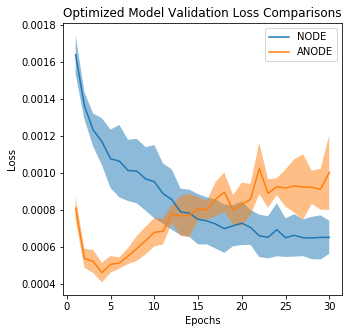

In [17]:
plt.plotLoss("Optimized Model Validation Loss Comparisons")

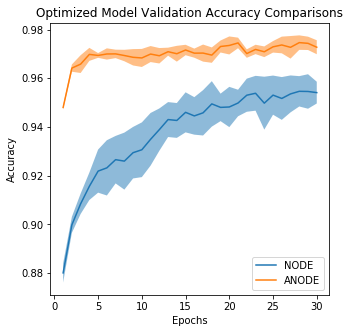

In [18]:
plt.plotAccuracy("Optimized Model Validation Accuracy Comparisons")

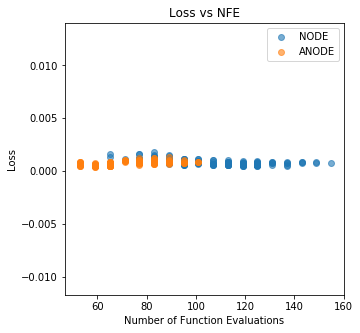

In [21]:
plt.plotNFE("Loss vs NFE", style='loss')

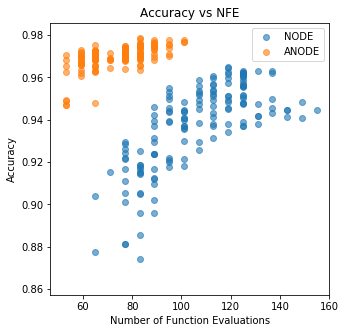

In [20]:
plt.plotNFE("Accuracy vs NFE", style='accuracy')